In [1]:
#Cell to import libraries
import numpy as np
import matplotlib.pyplot as plt

# Part A: Solving differential equation using Euler method

In this part, the differential equation of x'' + kx' + x^3 = Bcos(t) was solved by rewriting x' = v and applying Eulers numerical integration algorithm. The step size and sample size of 0.001 and 50000 respectively was chosen by experimentally determining the boundary of divergence and evaluating the tradeoff between runtime and accuracy.

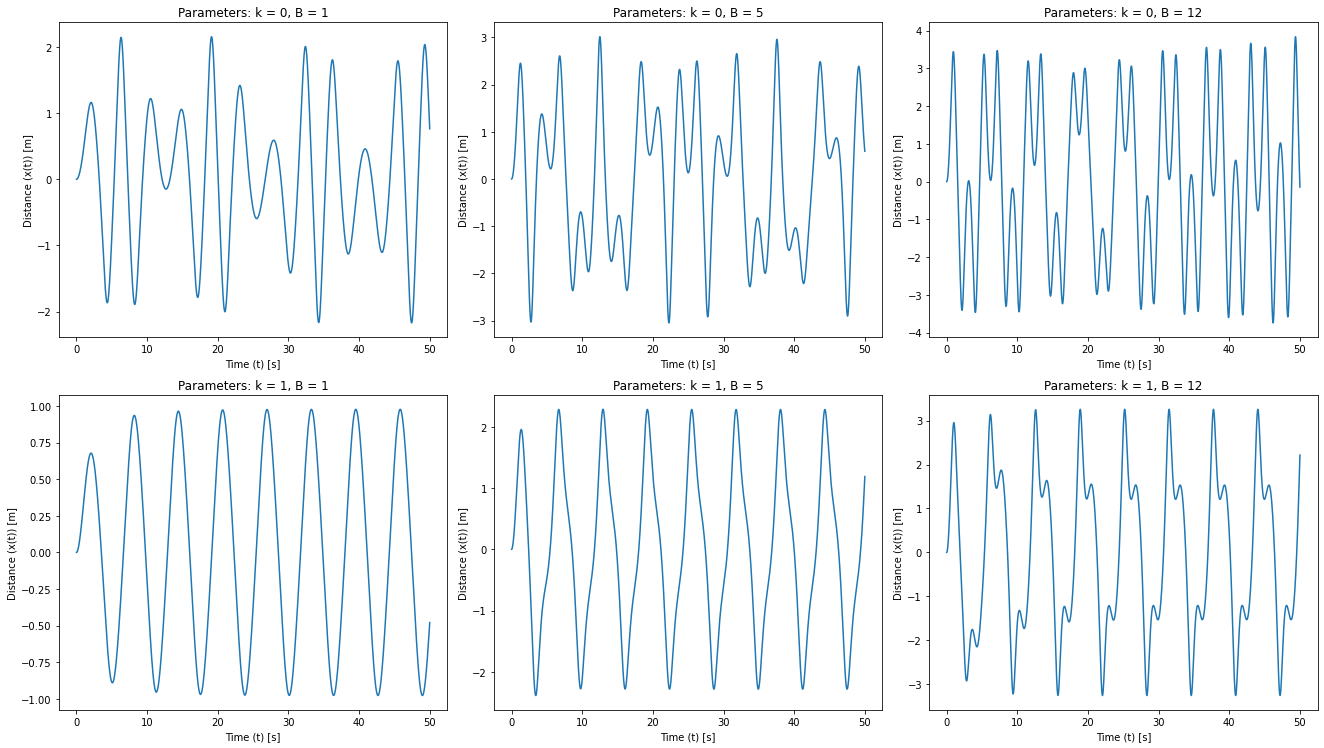

In [38]:
k = [0, 1]
B = [1, 5, 12]


#dv/dt = Bcos(t) - kv - x^3
def get_a(x, v, t, B, k):
    return B * np.cos(t) - k * v - np.power(x, 3)


def solve_by_euler(k, B, N, tau):
    #single derivatives, initial value = 0 (assumption)
    v = [0]
    #function values
    x = [0]
    #double derivatives, initial value = 0 (assumption)
    a = [get_a(x[0], v[0], 0, B, k)]
    
    for t in range(0, N - 1):
        x_current = x[t]
        v_current = v[t]
        a_current = a[t]
    
        #Performing Euler algorithm step
        v_new = v_current + tau * a_current
        x_new = x_current + tau * v_current
        
        #Appending new parameters to the tracking list
        x.append(x_new)
        v.append(v_new)
        a.append(get_a(x_new, v_new, (t + 1) * tau, B, k))
        
    
    return np.array(x)

#Step size
tau = 0.001
#Number of steps
N = 50000
#Time
t = [n * 0.001 for n in range(N)]

fig, axs = plt.subplots(2, 3)

#Here, computing and plotting solutions for differential equations
for i in range(len(k)):
    for j in range(len(B)):
        k_current = k[i]
        B_current = B[j]
        x = solve_by_euler(k_current, B_current, N, tau)
        
        axs[i, j].plot(t, x)
        axs[i, j].set_title(f'Parameters: k = {k_current}, B = {B_current}')
        axs[i, j].set_xlabel('Time (t) [s]')
        axs[i, j].set_ylabel('Distance (x(t)) [m]')

fig.set_size_inches(18.5, 10.5)        
fig.tight_layout()

The solutions for differential equation yielded the above results. 

By fixing k and increasing B, more covered amplitudes can be seen, so it can be inferred that the parameter B has an effect on the speed of oscillation and the smaller the k, the bigger the effect, same can be said for amplitude.

By fixing B and increasing k, the amplitude shrinkage can be observed and the intermediate oscillations dissapear, graph becomes smoother, therefore it can be inferred that parameter k has an effect on amplitude and some effect on oscillation speed, but smaller than B. 

# Part B Determining the spectra (plots with linear scale)

In this part, the effect of step size and sample size on Fourier transform of the differential equation solution will be investigated by means of Discrete Fourier Transform algorithm. In order to present visual data clearly, only 1 sample solution with k = 1 and B = 5 will be analyzed. The analysis can be easily repeated for the other samples as well by changing the list index in k_test and B_test.

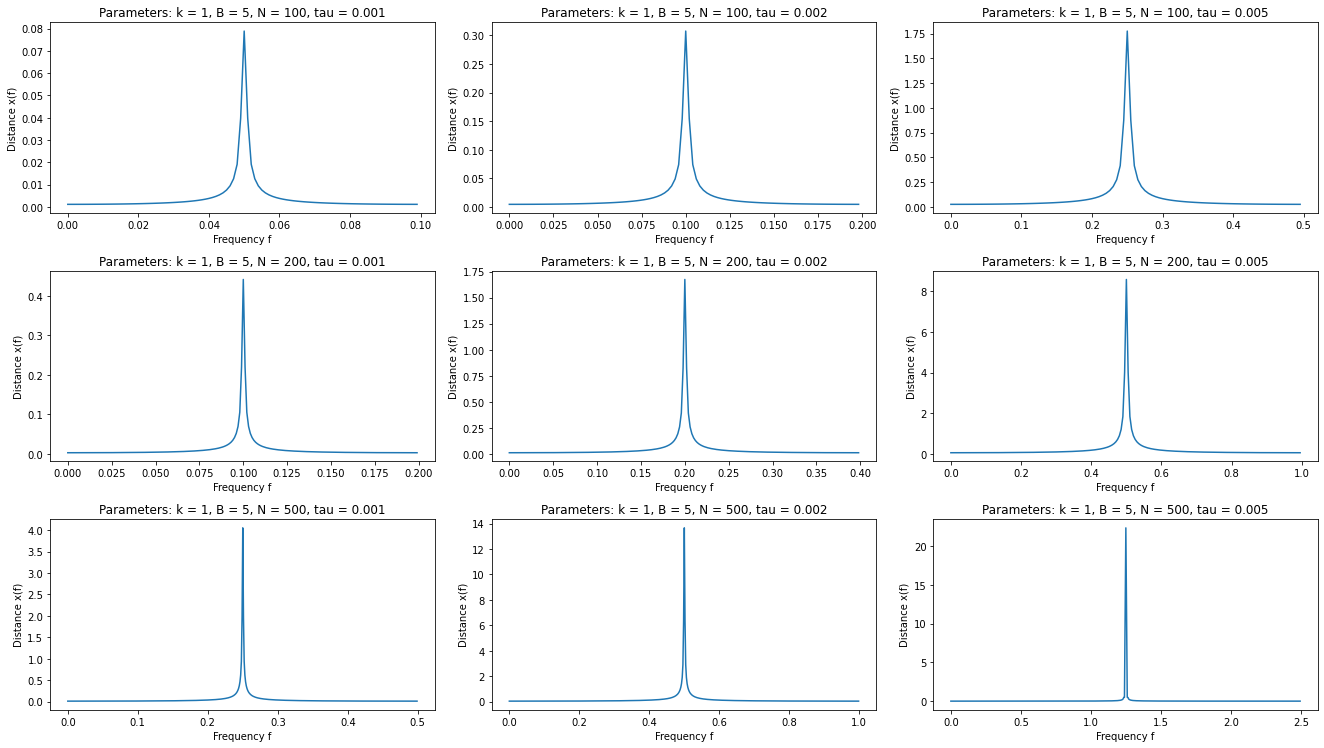

In [44]:
#Function to compute the fourier coefficient (index) marks the number of the coefficient
def compute_coefficient(points, index):
    return sum([points[k] * np.exp(-1j * 2 * np.pi * k * index / len(points)) for k in range(len(points))])


#function that actually computes discrete Fourier transform
def DFT(function_point_set):
    return np.array([compute_coefficient(function_point_set, i) for i in range(len(function_point_set))])


#Used to perform shift after Fourier transform, because the frequency needs to be cenetered at 0
#The idea behind is to reflect the dataset according to the main axis. Example: 12345 => 45312
def perform_shift(dataset):
    split_index = int(len(dataset) / 2)
    datalist = dataset.tolist()
    
    return np.array(datalist[split_index:] + datalist[:split_index])


def transform(point_set):
    return perform_shift(np.abs(DFT(point_set))) / np.sqrt(len(x))


N_original = 10 ** 2
tau_original = 0.001
N = [N_original * m for m in [1, 2, 5]]
tau = [tau_original * m for m in [1, 2, 5]]

#Selecting one combination k, b for the plot to not clutter the space
#To run a test with different combination change k[1] to k[0] and B[1] to B[0] or B[2]
k_test = k[1]
B_test = B[1]


fig, axs = plt.subplots(3, 3)

for i in range(len(N)):
    for j in range(len(tau)):
        N_current = N[i]
        tau_current = tau[j]
        x = solve_by_euler(k_test, B_test, N_current, tau_current)

        fourier = transform(x)
        t = [n * tau_current for n in range(N_current)]
        
        axs[i, j].plot(t, fourier)
        axs[i, j].set_title(f'Parameters: k = {k_test}, B = {B_test}, N = {N_current}, tau = {tau_current}')
        axs[i, j].set_xlabel('Frequency f')
        axs[i, j].set_ylabel('Distance x(f)')
        
fig.set_size_inches(18.5, 10.5)        
fig.tight_layout()

The fourier transform graphs clearly show, that by fixing N and increasing step size, we get a higher peak of the Fourier transform and a longer frequency period. 

By fixing step size and increasing number of samples N, we get an increase in localization of the Fourier transform and a sharp rise in the peak height, in addition we get a longer frequency interval.

Both parameter increase also shifts the center of the transform.

# Determining the spectra (plots with logarithmic scale)

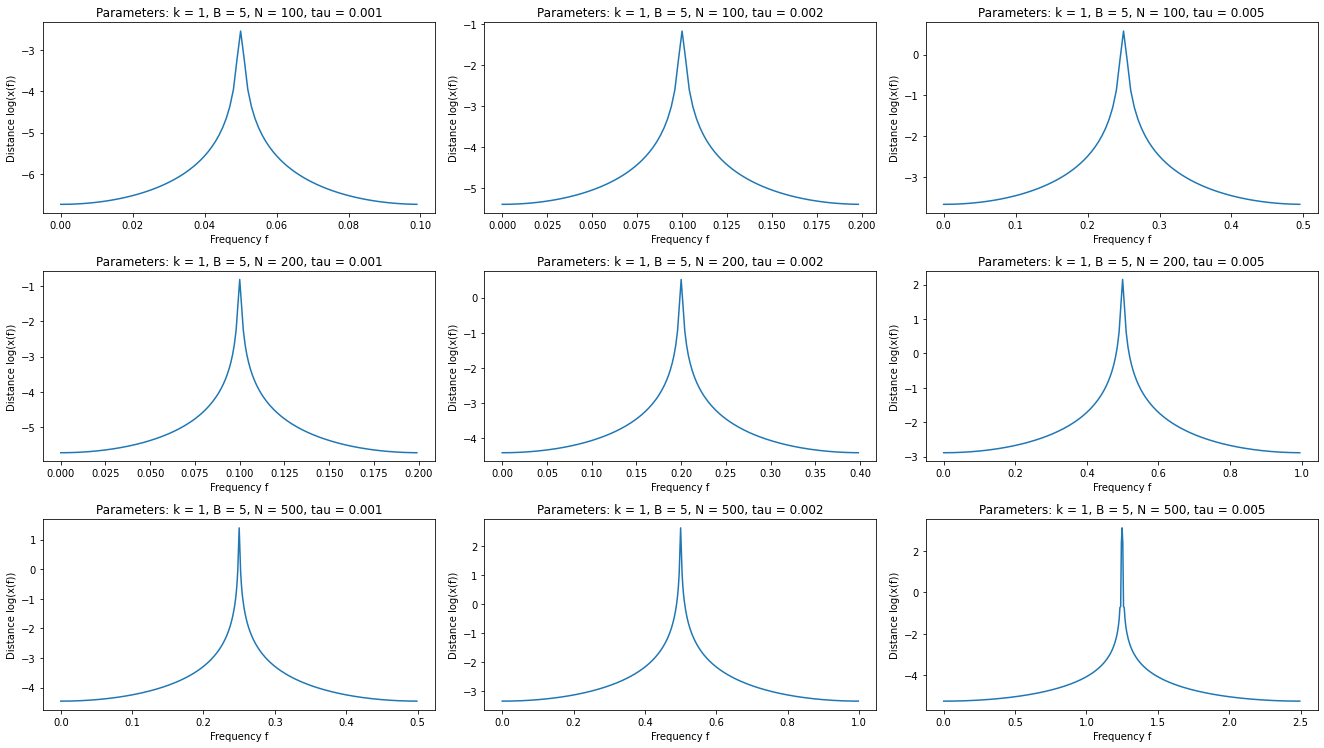

In [45]:
fig, axs = plt.subplots(3, 3)

for i in range(len(N)):
    for j in range(len(tau)):
        N_current = N[i]
        tau_current = tau[j]
        x = solve_by_euler(k_test, B_test, N_current, tau_current)

        fourier = transform(x)
        t = [n * tau_current for n in range(N_current)]
        
        axs[i, j].plot(t, np.log(fourier))
        axs[i, j].set_title(f'Parameters: k = {k_test}, B = {B_test}, N = {N_current}, tau = {tau_current}')
        axs[i, j].set_xlabel('Frequency f')
        axs[i, j].set_ylabel('Distance log(x(f))')
        
        
fig.set_size_inches(18.5, 10.5)        
fig.tight_layout()

Same conclusions can be drawn form the logarithmic plots